## Step1: Insert some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import plotting
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from matplotlib import colors
%matplotlib inline
plt.style.use("fivethirtyeight")

# Task1:Data Observation

In [2]:
data = pd.read_csv("CW_Data.csv")
# 2.2 visualize the first 5 rows
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Programme
0,1.0,32.0,7.0,3.0,12.0,4.0,1.0
1,2.0,32.0,7.0,10.0,12.0,12.0,2.0
2,3.0,12.0,0.0,0.0,0.0,0.0,1.0
3,4.0,16.0,0.0,2.0,0.0,1.0,3.0
4,5.0,28.0,0.0,0.0,0.0,0.0,2.0


In [3]:
# 2.4 Check to see if the table has empty values
data.isnull().sum()

ID           1
Q1           1
Q2           1
Q3           1
Q4           1
Q5           1
Programme    1
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
# 2.4 Check to see if the table has infinite values
np.isinf(data).sum()

ID           0
Q1           0
Q2           0
Q3           0
Q4           0
Q5           0
Programme    0
dtype: int64

In [6]:
# Count the number of students in each program
program_value = data.loc[:, 'Programme'].value_counts()
program_value

2.0    262
1.0    164
4.0     46
3.0     30
0.0     12
Name: Programme, dtype: int64

In [7]:
data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Programme
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,257.500000,25.836576,3.583658,7.793774,5.249027,7.931907,1.871595
std,148.523287,7.235697,3.218157,3.803697,6.323342,6.719182,0.902158
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.250000,22.000000,1.000000,6.000000,0.000000,2.000000,1.000000
50%,257.500000,26.000000,3.000000,10.000000,2.000000,6.000000,2.000000
75%,385.750000,32.000000,7.000000,10.000000,8.000000,12.000000,2.000000
max,514.000000,40.000000,10.000000,10.000000,20.000000,20.000000,4.000000


In [8]:
data.rename(columns={'Programme' : 'Program'}, inplace=True)

In [9]:
from pandas import Series, DataFrame
program_dict = {
    'Program': [0,1,2,3,4],
    'Number' : [12,164,262,30,46]
}
p = DataFrame(data = program_dict)
p

,Program,Number
0,0,12
1,1,164
2,2,262
3,3,30
4,4,46


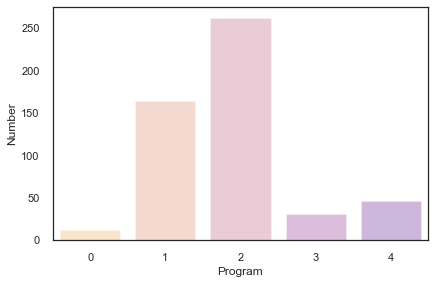

In [10]:
sns.set(style="white") #设置绘图背景

g = sns.barplot(x="Program", y="Number",data=p,
                   palette="plasma_r",ci=95,errcolor='yellow', errwidth=2, alpha=0.3) #BuPu

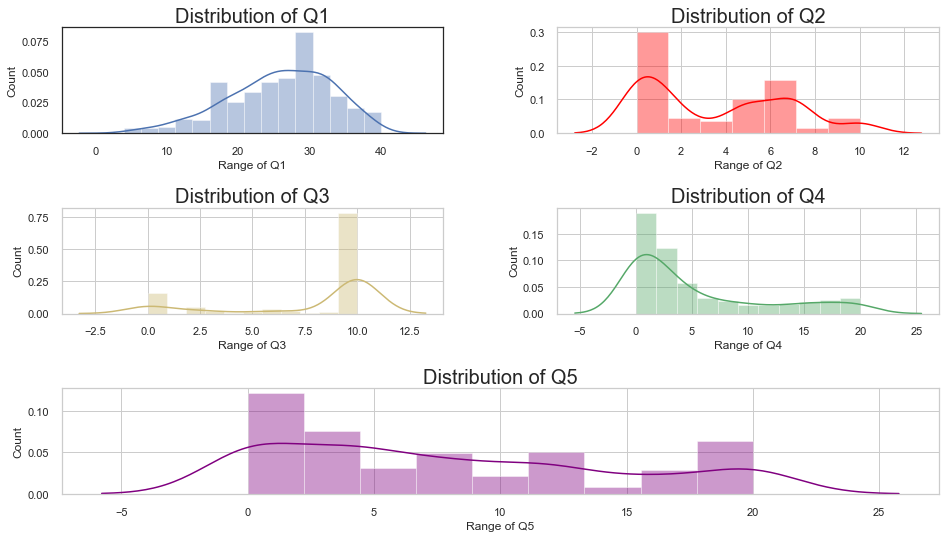

In [11]:
# 2.5 可视化：年收入分布，年龄分布
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 8) # 画布大小
fig = plt.figure()

# 2.5.1 The first chart
plt.subplot(3, 2, 1) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q1']) # 数据展示
plt.title('Distribution of Q1', fontsize=20) # 标题设置
plt.xlabel('Range of Q1') # 横轴
plt.ylabel('Count') # 纵轴

# 2.5.2 The second chart
plt.subplot(3,2,2) # 3行2列2号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q2'], color='red') # 数据展示
plt.title("Distribution of Q2", fontsize=20) # 标题设置
plt.xlabel("Range of Q2") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.3 The third chart
plt.subplot(3,2,3) # 3行2列3号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q3'], color='y') # 数据展示
plt.title("Distribution of Q3", fontsize=20) # 标题设置
plt.xlabel("Range of Q3") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.4 The fourth chart
plt.subplot(3,2,4) # 3行2列4号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q4'], color='g') # 数据展示
plt.title("Distribution of Q4", fontsize=20) # 标题设置
plt.xlabel("Range of Q4") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.5 The fifth chart
plt.subplot(3,1,3) # 3行2列5号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q5'], color='purple') # 数据展示
plt.title("Distribution of Q5", fontsize=20) # 标题设置
plt.xlabel("Range of Q5") # 横轴
plt.ylabel("Count") # 纵轴

fig.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show() # 显示

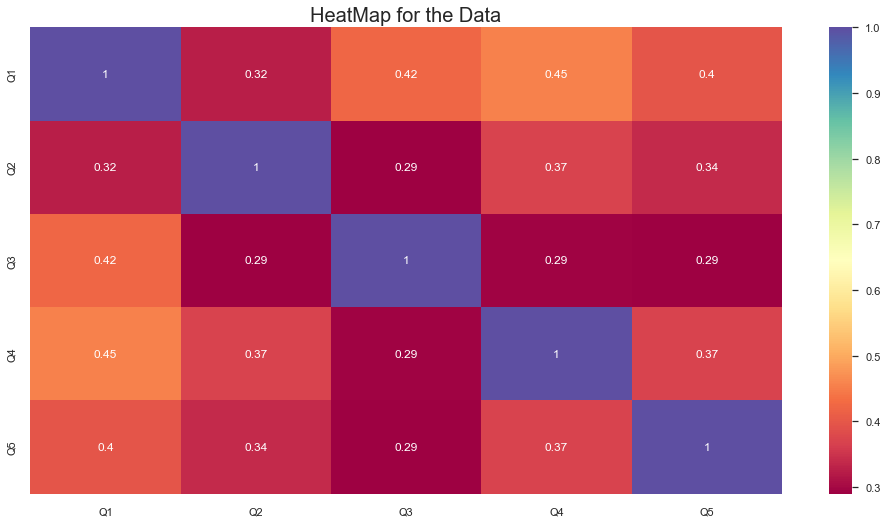

In [12]:
# 2.10 数据之间的相关系数，热图heatMap展示
heat_data = data.iloc[:, 1:-1]
plt.rcParams['figure.figsize'] = (15, 8) # 画布大小
sns.heatmap(heat_data.corr(), cmap='Spectral', annot=True) # 数据展示 Wistia
plt.title("HeatMap for the Data", fontsize=20) # 标题
plt.show() 

In [13]:
from sklearn.decomposition import PCA
datacopy = heat_data
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(datacopy)
X_mle = pca_mle.transform(datacopy)
X_mle

array([[  4.84494792,  -7.13961484,   3.96557518,   5.08221554],
       [ 10.44176684,  -1.00465302,   2.0079503 ,  -0.64037856],
       [-17.84889789,   2.0601403 ,   4.17650212,   3.90192341],
       ...,
       [-12.35127982,   0.21289401,   4.58589234,  -6.67692725],
       [ -6.04171298,   1.01907772,  -2.56140441,  -2.81944686],
       [ -4.96874246,  -2.04331106,  -1.59344735,  -2.10546486]])

In [14]:
PCA_ds = pd.DataFrame(X_mle, columns=['Q6','Q7','Q8','Q9'])
PCA_ds

,Q6,Q7,Q8,Q9
0,4.844948,-7.139615,3.965575,5.082216
1,10.441767,-1.004653,2.007950,-0.640379
2,-17.848898,2.060140,4.176502,3.901923
3,-14.331395,0.611238,1.856743,3.043215
4,-7.504055,-6.489977,-3.759234,7.490445
...,...,...,...,...
509,-5.277938,-2.597153,-4.029569,0.943427
510,19.496316,3.259493,6.224155,1.815350
511,-12.351280,0.212894,4.585892,-6.676927
512,-6.041713,1.019078,-2.561404,-2.819447


In [15]:
PCA_ds['ID'] = list(range(1,515))
PCA_ds['ID'] = PCA_ds['ID'].astype(float)
PCA_ds

,Q6,Q7,Q8,Q9,ID
0,4.844948,-7.139615,3.965575,5.082216,1.0
1,10.441767,-1.004653,2.007950,-0.640379,2.0
2,-17.848898,2.060140,4.176502,3.901923,3.0
3,-14.331395,0.611238,1.856743,3.043215,4.0
4,-7.504055,-6.489977,-3.759234,7.490445,5.0
...,...,...,...,...,...
509,-5.277938,-2.597153,-4.029569,0.943427,510.0
510,19.496316,3.259493,6.224155,1.815350,511.0
511,-12.351280,0.212894,4.585892,-6.676927,512.0
512,-6.041713,1.019078,-2.561404,-2.819447,513.0


In [16]:
# Merge two dataframes
data = pd.merge(data, PCA_ds, how='outer')
data

,ID,Q1,Q2,Q3,Q4,Q5,Program,Q6,Q7,Q8,Q9
0,1.0,32.0,7.0,3.0,12.0,4.0,1.0,4.844948,-7.139615,3.965575,5.082216
1,2.0,32.0,7.0,10.0,12.0,12.0,2.0,10.441767,-1.004653,2.007950,-0.640379
2,3.0,12.0,0.0,0.0,0.0,0.0,1.0,-17.848898,2.060140,4.176502,3.901923
3,4.0,16.0,0.0,2.0,0.0,1.0,3.0,-14.331395,0.611238,1.856743,3.043215
4,5.0,28.0,0.0,0.0,0.0,0.0,2.0,-7.504055,-6.489977,-3.759234,7.490445
...,...,...,...,...,...,...,...,...,...,...,...
509,510.0,26.0,0.0,7.0,0.0,4.0,2.0,-5.277938,-2.597153,-4.029569,0.943427
510,511.0,34.0,5.0,10.0,20.0,20.0,2.0,19.496316,3.259493,6.224155,1.815350
511,512.0,14.0,7.0,10.0,2.0,0.0,1.0,-12.351280,0.212894,4.585892,-6.676927
512,513.0,22.0,1.0,10.0,0.0,6.0,0.0,-6.041713,1.019078,-2.561404,-2.819447


In [17]:
order=['ID','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Program']
data = data[order]
data

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Program
0,1.0,32.0,7.0,3.0,12.0,4.0,4.844948,-7.139615,3.965575,5.082216,1.0
1,2.0,32.0,7.0,10.0,12.0,12.0,10.441767,-1.004653,2.007950,-0.640379,2.0
2,3.0,12.0,0.0,0.0,0.0,0.0,-17.848898,2.060140,4.176502,3.901923,1.0
3,4.0,16.0,0.0,2.0,0.0,1.0,-14.331395,0.611238,1.856743,3.043215,3.0
4,5.0,28.0,0.0,0.0,0.0,0.0,-7.504055,-6.489977,-3.759234,7.490445,2.0
...,...,...,...,...,...,...,...,...,...,...,...
509,510.0,26.0,0.0,7.0,0.0,4.0,-5.277938,-2.597153,-4.029569,0.943427,2.0
510,511.0,34.0,5.0,10.0,20.0,20.0,19.496316,3.259493,6.224155,1.815350,2.0
511,512.0,14.0,7.0,10.0,2.0,0.0,-12.351280,0.212894,4.585892,-6.676927,1.0
512,513.0,22.0,1.0,10.0,0.0,6.0,-6.041713,1.019078,-2.561404,-2.819447,0.0


In [18]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

## Feature Selection

In [19]:
# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Initialize an empty array to hold feature importances
feature_importances = np.zeros(heat_data.shape[1])

In [20]:
# Create the model with several hyperparameters
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=0)
lgbm = lgbm.fit(X_train,y_train)
score = lgbm.score(X_test, y_test)
print("LGBM Forest:{}".format(score))

LGBM Forest:0.47096774193548385


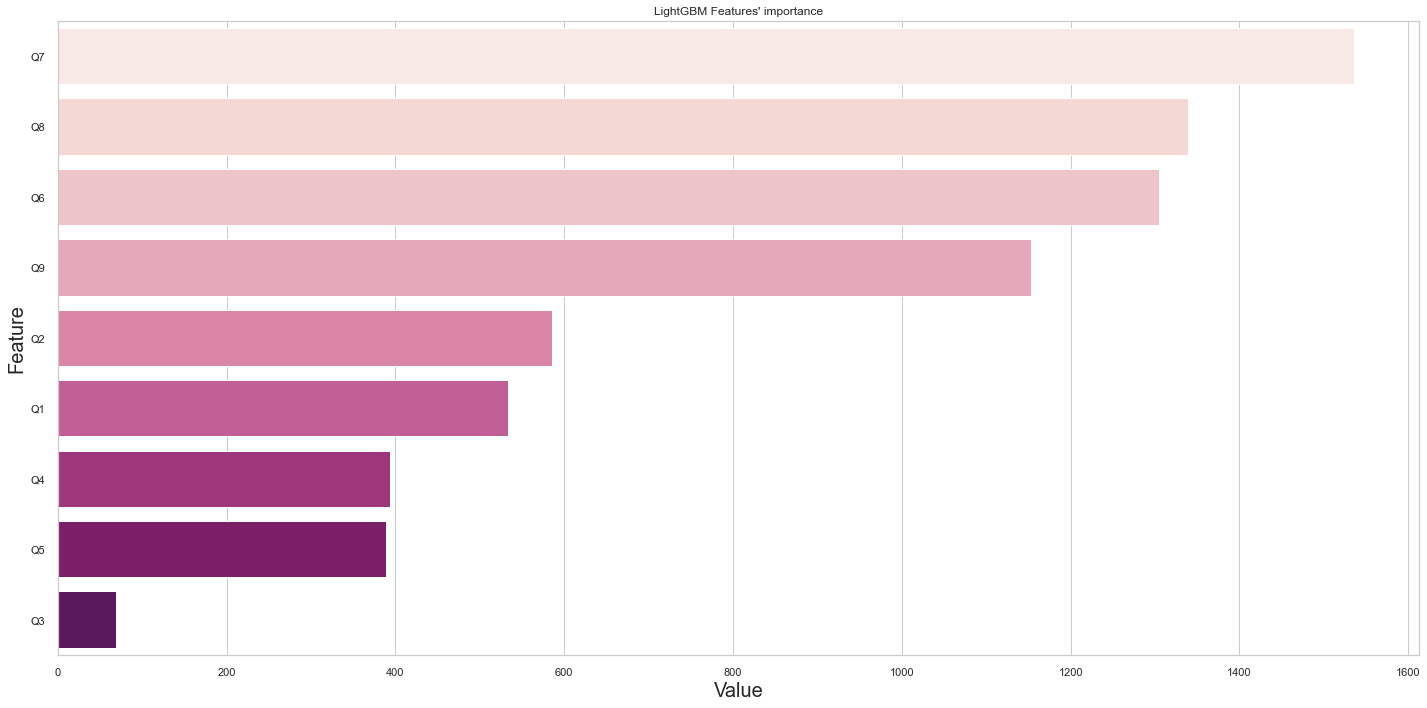

In [21]:
feature_name = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6','Q7','Q8','Q9']
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,feature_name)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
ax1=sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), 
            saturation=0.6, palette='RdPu') # pastel
# 调整xlabel的字体大小
ax1.xaxis.label.set_size(20)
# 调整ylabel的字体大小
ax1.yaxis.label.set_size(20)
plt.title('LightGBM Features\' importance')
plt.tight_layout()
plt.show()
#[*zip(feature_name,lgbm.feature_importances_)]

In [22]:
second_order = ['ID','Q2', 'Q6', 'Q7', 'Q8', 'Q9','Program']
data = data[second_order]
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
data

,ID,Q2,Q6,Q7,Q8,Q9,Program
0,1.0,7.0,4.844948,-7.139615,3.965575,5.082216,1.0
1,2.0,7.0,10.441767,-1.004653,2.007950,-0.640379,2.0
2,3.0,0.0,-17.848898,2.060140,4.176502,3.901923,1.0
3,4.0,0.0,-14.331395,0.611238,1.856743,3.043215,3.0
4,5.0,0.0,-7.504055,-6.489977,-3.759234,7.490445,2.0
...,...,...,...,...,...,...,...
509,510.0,0.0,-5.277938,-2.597153,-4.029569,0.943427,2.0
510,511.0,5.0,19.496316,3.259493,6.224155,1.815350,2.0
511,512.0,7.0,-12.351280,0.212894,4.585892,-6.676927,1.0
512,513.0,1.0,-6.041713,1.019078,-2.561404,-2.819447,0.0


# Task 2

## Data Pre-processing

### Drawing Boxplot

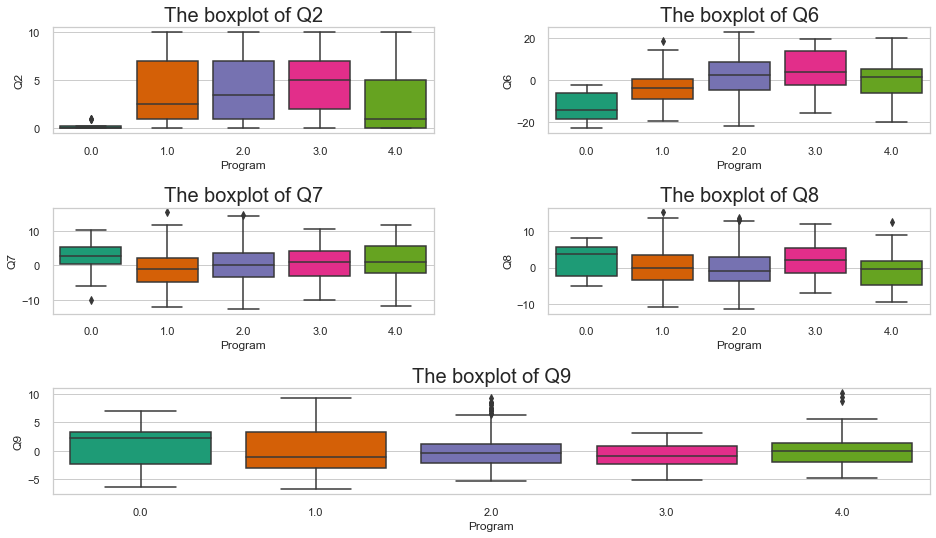

In [23]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 8) # 画布大小
fig = plt.figure()

# 2.5.1 The first chart
plt.subplot(3, 2, 1) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.boxplot(x="Program",y="Q2", data=data, palette='Dark2', saturation=0.95)
plt.title('The boxplot of Q2', fontsize=20) # 标题设置
plt.xlabel('Program') # 横轴
plt.ylabel('Q2') # 纵轴

plt.subplot(3, 2, 2) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.boxplot(x="Program",y="Q6", data=data, palette='Dark2', saturation=0.95)
plt.title('The boxplot of Q6', fontsize=20) # 标题设置
plt.xlabel('Program') # 横轴
plt.ylabel('Q6') # 纵轴

plt.subplot(3, 2, 3) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.boxplot(x="Program",y="Q7", data=data, palette='Dark2', saturation=0.95)
plt.title('The boxplot of Q7', fontsize=20) # 标题设置
plt.xlabel('Program') # 横轴
plt.ylabel('Q7') # 纵轴

plt.subplot(3, 2, 4) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.boxplot(x="Program",y="Q8", data=data, palette='Dark2', saturation=0.95)
plt.title('The boxplot of Q8', fontsize=20) # 标题设置
plt.xlabel('Program') # 横轴
plt.ylabel('Q8') # 纵轴

plt.subplot(3, 1, 3) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.boxplot(x="Program",y="Q9", data=data, palette='Dark2', saturation=0.95)
plt.title('The boxplot of Q9', fontsize=20) # 标题设置
plt.xlabel('Program') # 横轴
plt.ylabel('Q9') # 纵轴

fig.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show() # 显示

In [24]:
data = data.drop(data[(data.Program == 2.0) & (data.Q9 > 6.0)].index)
data = data.drop(data[(data.Program == 4.0) & (data.Q9 > 8.0)].index)
data = data.reset_index(drop = True)
data['ID'] = np.arange(0, 494)
data

,ID,Q2,Q6,Q7,Q8,Q9,Program
0,0,7.0,4.844948,-7.139615,3.965575,5.082216,1.0
1,1,7.0,10.441767,-1.004653,2.007950,-0.640379,2.0
2,2,0.0,-17.848898,2.060140,4.176502,3.901923,1.0
3,3,0.0,-14.331395,0.611238,1.856743,3.043215,3.0
4,4,0.0,-2.306624,10.333202,-3.382627,-2.049398,3.0
...,...,...,...,...,...,...,...
489,489,0.0,-5.277938,-2.597153,-4.029569,0.943427,2.0
490,490,5.0,19.496316,3.259493,6.224155,1.815350,2.0
491,491,7.0,-12.351280,0.212894,4.585892,-6.676927,1.0
492,492,1.0,-6.041713,1.019078,-2.561404,-2.819447,0.0


In [25]:
# Q2 Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp = data['Q2']
temp = DataFrame(temp)
Q2_std = scaler.fit_transform(temp)
Q2_std = DataFrame(Q2_std)
Q2_std.rename(columns={0:'score'},inplace=True)
Q2_std['ID'] = list(range(0, 494))
Q2_std['ID'] = Q2_std['ID'].astype(float)

In [26]:
data = pd.merge(data, Q2_std, how='outer')
data.drop('Q2',axis = 1,inplace = True)
data.rename(columns={'score':'Q2'},inplace=True)

In [27]:
last_order = ['ID','Q2', 'Q6', 'Q7', 'Q8', 'Q9','Program']
data = data[last_order]
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
data

,ID,Q2,Q6,Q7,Q8,Q9,Program
0,0,1.037881,4.844948,-7.139615,3.965575,5.082216,1.0
1,1,1.037881,10.441767,-1.004653,2.007950,-0.640379,2.0
2,2,-1.143878,-17.848898,2.060140,4.176502,3.901923,1.0
3,3,-1.143878,-14.331395,0.611238,1.856743,3.043215,3.0
4,4,-1.143878,-2.306624,10.333202,-3.382627,-2.049398,3.0
...,...,...,...,...,...,...,...
489,489,-1.143878,-5.277938,-2.597153,-4.029569,0.943427,2.0
490,490,0.414522,19.496316,3.259493,6.224155,1.815350,2.0
491,491,1.037881,-12.351280,0.212894,4.585892,-6.676927,1.0
492,492,-0.832198,-6.041713,1.019078,-2.561404,-2.819447,0.0


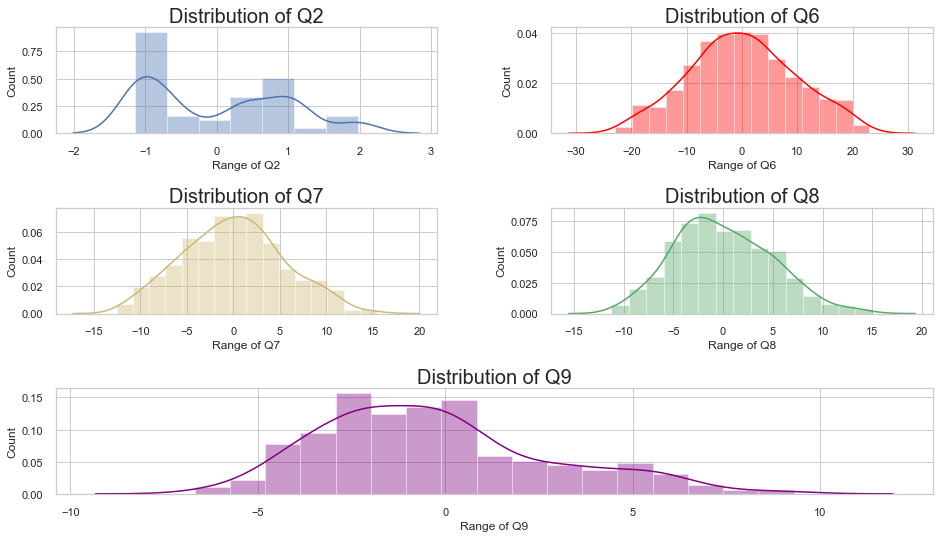

In [28]:
# 2.5 可视化：年收入分布，年龄分布
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 8) # 画布大小
fig = plt.figure()

# 2.5.1 The first chart
plt.subplot(3, 2, 1) # 3行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q2']) # 数据展示
plt.title('Distribution of Q2', fontsize=20) # 标题设置
plt.xlabel('Range of Q2') # 横轴
plt.ylabel('Count') # 纵轴

# 2.5.2 The second chart
plt.subplot(3,2,2) # 3行2列2号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q6'], color='red') # 数据展示
plt.title("Distribution of Q6", fontsize=20) # 标题设置
plt.xlabel("Range of Q6") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.3 The third chart
plt.subplot(3,2,3) # 3行2列3号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q7'], color='y') # 数据展示
plt.title("Distribution of Q7", fontsize=20) # 标题设置
plt.xlabel("Range of Q7") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.4 The fourth chart
plt.subplot(3,2,4) # 3行2列4号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q8'], color='g') # 数据展示
plt.title("Distribution of Q8", fontsize=20) # 标题设置
plt.xlabel("Range of Q8") # 横轴
plt.ylabel("Count") # 纵轴

# 2.5.5 The fifth chart
plt.subplot(3,1,3) # 3行2列5号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Q9'], color='purple') # 数据展示
plt.title("Distribution of Q9", fontsize=20) # 标题设置
plt.xlabel("Range of Q9") # 横轴
plt.ylabel("Count") # 纵轴

fig.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show() # 显示

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(X_train,y_train)
score_r = rfc.score(X_test,y_test)
print("Random Forest:{}".format(score_r))

Random Forest:0.5771812080536913


0.5566122448979594 63


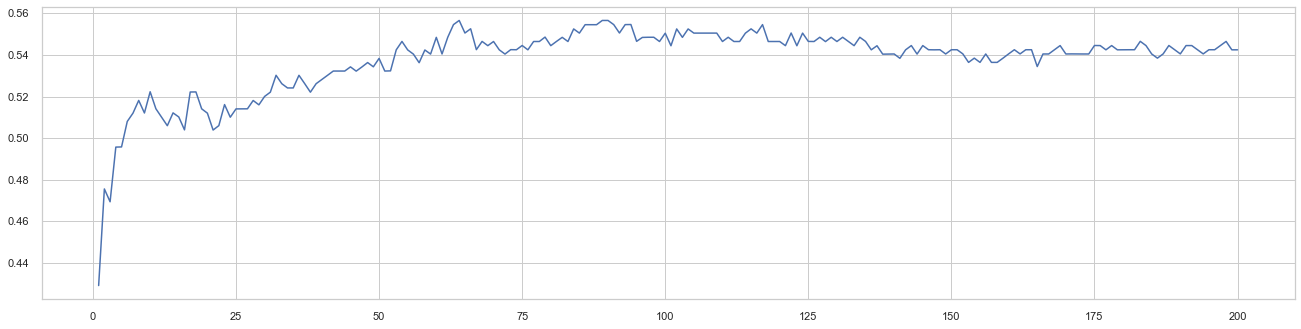

In [30]:
# the learning rate of n-estimator
from sklearn.model_selection import cross_val_score
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=0)
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
# plt.plot(range(1,201),superpa)
sns.lineplot(range(1,201),superpa)
plt.show()

In [30]:
## After getting the best estimator, retrain the RF
rfc = RandomForestClassifier(n_estimators=180, random_state=0)
rfc = rfc.fit(X_train,y_train)
score_r = rfc.score(X_test,y_test)
print("Random Forest:{}".format(score_r))

Random Forest:0.5637583892617449


In [32]:
Y_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test,Y_pred)
cm

array([[ 0,  1,  3,  0,  0],
       [ 0, 31, 19,  0,  2],
       [ 0, 15, 52,  2,  0],
       [ 0,  4,  6,  0,  0],
       [ 0,  3, 10,  0,  1]], dtype=int64)

<AxesSubplot:xlabel='Predicted Program', ylabel='Actual Program'>

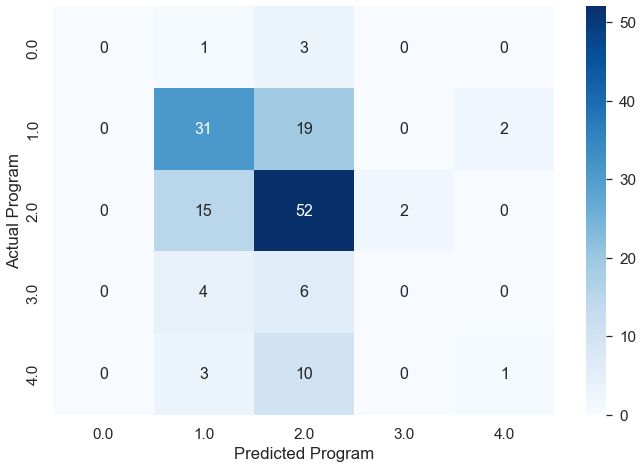

In [34]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Program'
df_cm.columns.name = 'Predicted Program'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## SVM

In [35]:
# Train the classifier
from sklearn.svm import SVC
from time import time
import datetime
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time_zero = time()
    svm= SVC(kernel = kernel,
             gamma="auto"
            ).fit(X_train,y_train)
    print("The accuracy under kernel %s is %f" % (kernel,svm.score(X_test,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time_zero).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.570470
00:00:026999
The accuracy under kernel poly is 0.543624
00:49:350757
The accuracy under kernel rbf is 0.469799
00:00:019992
The accuracy under kernel sigmoid is 0.436242
00:00:013833


In [57]:
Y_pred = SVC(kernel = '',
             gamma="auto"
            ).predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Naive Bayes and Cross-validation

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [37]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)
gnb_score

0.4966442953020134

In [38]:
Y_pred = gnb.predict(X_test)
Y_pred

array([1., 2., 2., 0., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 1., 2., 2., 1., 0., 1., 2., 1., 1., 1., 1.,
       2., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
       1., 1., 1., 2., 2., 2., 2., 0., 2., 2., 2., 1., 2., 2., 2., 0., 2.,
       2., 2., 1., 1., 2., 2., 0., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 3., 1., 2., 2., 2., 1., 2., 2.,
       2., 1., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 0., 2., 2., 0., 1.,
       2., 1., 1., 2., 2., 2., 0., 2., 1., 2., 1., 2., 0., 1., 2., 2., 2.,
       2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1.])

In [39]:
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test,Y_pred)
cm

array([[ 2,  2,  0,  0,  0],
       [ 5, 24, 23,  0,  0],
       [ 3, 17, 48,  1,  0],
       [ 0,  4,  6,  0,  0],
       [ 3,  3,  8,  0,  0]], dtype=int64)

<AxesSubplot:xlabel='Predicted Program', ylabel='Actual Program'>

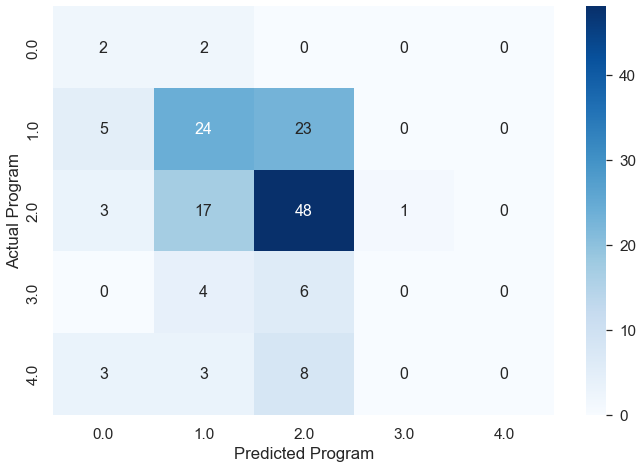

In [40]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Program'
df_cm.columns.name = 'Predicted Program'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [41]:
def plot_learning_curve(estimator, title, X, y,
                       ax, #选择子图
                       ylime=None, # 设置纵坐标的取值范围
                       cv=None, #交叉验证
                       n_jobs=None #设定所要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylime is not None:
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
        ax.grid() #显示网格作为背景，不是必须
        ax.plot(train_sizes, np.mean(train_scores,axis=1),'o-',color='r',label="Training score")
        ax.plot(train_sizes, np.mean(test_scores,axis=1), 'o-',color='g',label="Test score")
        ax.legend(loc="best")
        return ax

In [42]:
title = ["Naive Bayes", "SVM", "Random Forest"]
model = [GaussianNB(), SVC(kernel="linear", gamma="auto"), RandomForestClassifier(n_estimators=180)]
cv = ShuffleSplit(n_splits=50,test_size=0.2,random_state=0)

Naive Bayes:00:03:623893
SVM:00:01:393366
Random Forest:00:15:571651


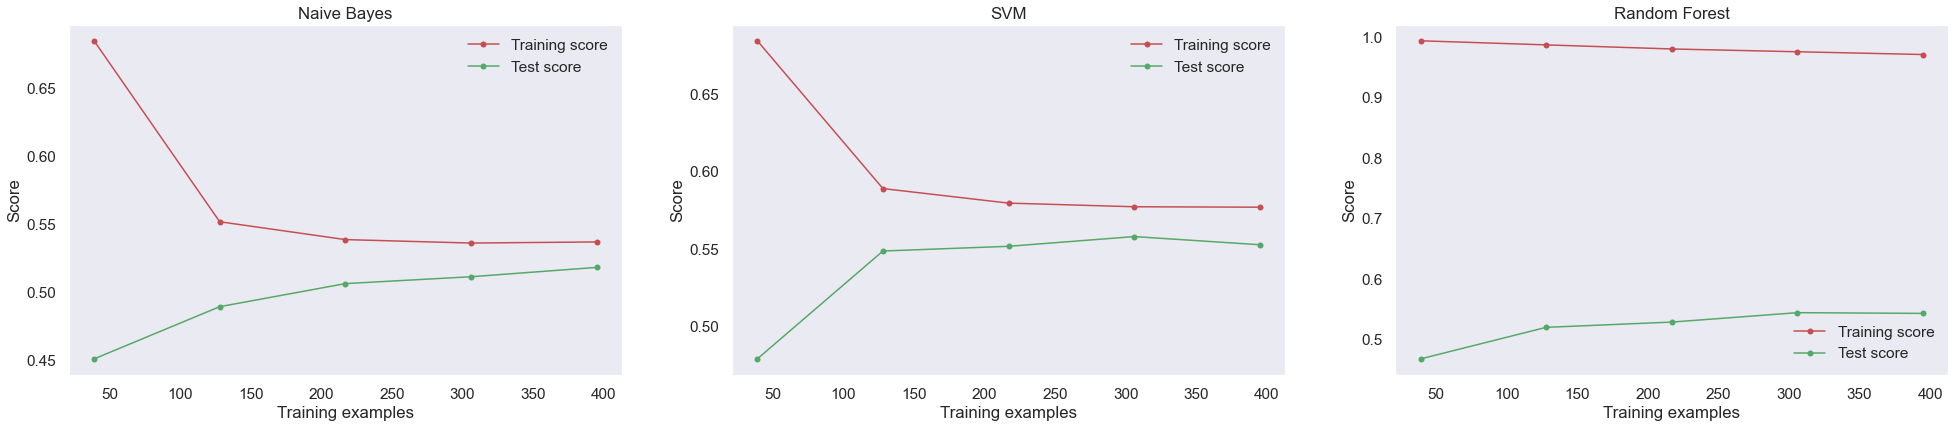

In [43]:
fig, axes = plt.subplots(1,3,figsize=(30,6))
for ind, title_, estimator in zip (range(len(title)), title, model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                       ax=axes[ind], ylime=[0.4, 1.05], n_jobs=4,cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

# Task 3

In [44]:
data_features = data.iloc[:, 1:-1]
data_features

,Q2,Q6,Q7,Q8,Q9
0,1.037881,4.844948,-7.139615,3.965575,5.082216
1,1.037881,10.441767,-1.004653,2.007950,-0.640379
2,-1.143878,-17.848898,2.060140,4.176502,3.901923
3,-1.143878,-14.331395,0.611238,1.856743,3.043215
4,-1.143878,-2.306624,10.333202,-3.382627,-2.049398
...,...,...,...,...,...
489,-1.143878,-5.277938,-2.597153,-4.029569,0.943427
490,0.414522,19.496316,3.259493,6.224155,1.815350
491,1.037881,-12.351280,0.212894,4.585892,-6.676927
492,-0.832198,-6.041713,1.019078,-2.561404,-2.819447


## 3D Projection

In [45]:
pca = PCA(n_components=3)
pca.fit(data_features)
PCA_ds = pd.DataFrame(pca.transform(data_features), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,494.0,1.058982e-15,9.555714,-22.902399,-6.653783,0.272479,6.178852,23.235154
col2,494.0,-1.303501e-16,5.410718,-12.363711,-3.864305,0.007204,3.488578,15.367188
col3,494.0,-1.078759e-17,4.919456,-11.095292,-3.639552,-0.406803,3.443808,15.198660


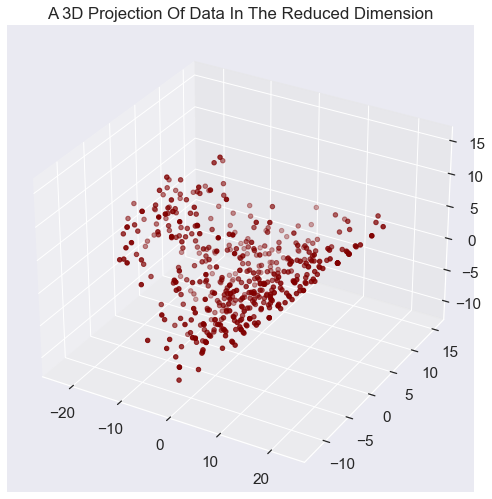

In [46]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Elbow Method to determine the number of clusters to be formed:


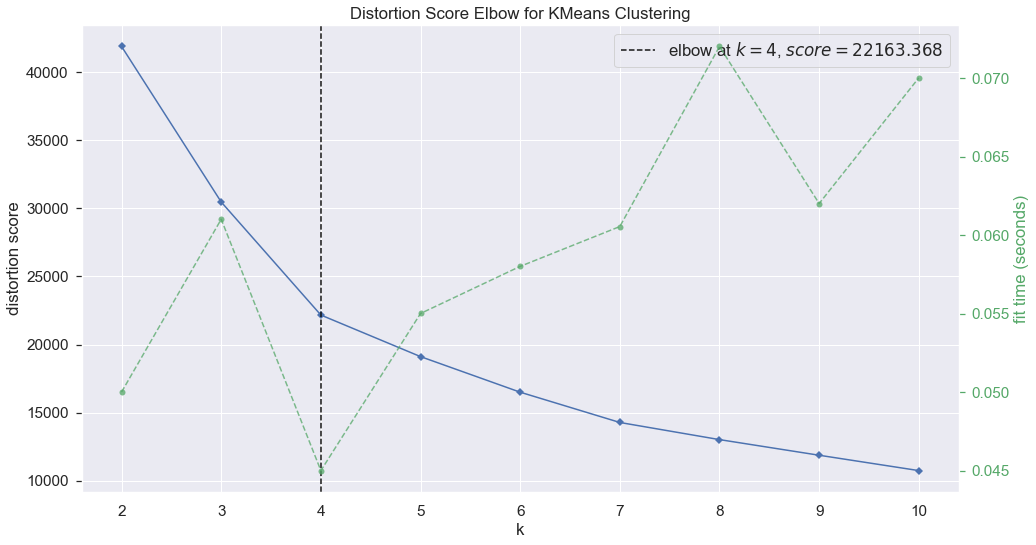

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [48]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

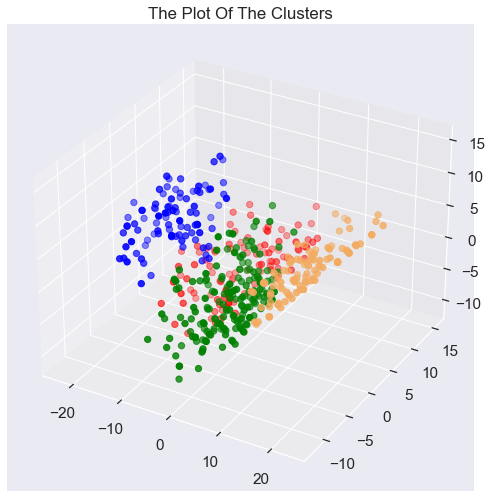

In [49]:
#Plotting the clusters
cmap = colors.ListedColormap(["red", "blue", "green", "#B9C0C9", "blue", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y,z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## K-means Accuracy

In [50]:
data

,ID,Q2,Q6,Q7,Q8,Q9,Program,Clusters
0,0,1.037881,4.844948,-7.139615,3.965575,5.082216,1.0,1
1,1,1.037881,10.441767,-1.004653,2.007950,-0.640379,2.0,2
2,2,-1.143878,-17.848898,2.060140,4.176502,3.901923,1.0,3
3,3,-1.143878,-14.331395,0.611238,1.856743,3.043215,3.0,3
4,4,-1.143878,-2.306624,10.333202,-3.382627,-2.049398,3.0,0
...,...,...,...,...,...,...,...,...
489,489,-1.143878,-5.277938,-2.597153,-4.029569,0.943427,2.0,1
490,490,0.414522,19.496316,3.259493,6.224155,1.815350,2.0,2
491,491,1.037881,-12.351280,0.212894,4.585892,-6.676927,1.0,3
492,492,-0.832198,-6.041713,1.019078,-2.561404,-2.819447,0.0,1


In [51]:
p0_bol = (data['Program'] == 0.0) & (data['Clusters'] == 0)
p1_bol = (data['Program'] == 1.0) & (data['Clusters'] == 1)
p2_bol = (data['Program'] == 2.0) & (data['Clusters'] == 2)
p3_bol = (data['Program'] == 3.0) & (data['Clusters'] == 3)
program0 = (data['Program'] == 0.0).sum()
program1 = (data['Program'] == 1.0).sum()
program2 = (data['Program'] == 2.0).sum()
program3 = (data['Program'] == 3.0).sum()
# P0_accuracy = (p0_bol == True).sum() / program0
# P1_accuracy = (p1_bol == True).sum() / program1
# P2_accuracy = (p2_bol == True).sum() / program2
# P3_accuracy = (p3_bol == True).sum() / program3

In [52]:
print((data['Clusters'] == 0).sum() / len(data['Clusters']))
print((data['Clusters'] == 1).sum() / len(data['Clusters']))
print((data['Clusters'] == 2).sum() / len(data['Clusters']))
print((data['Clusters'] == 3).sum() / len(data['Clusters']))

0.20647773279352227
0.3765182186234818
0.19433198380566802
0.22267206477732793


In [53]:
cluster0 = (data['Clusters'] == 0).sum() / len(data['Clusters'])
cluster1 = (data['Clusters'] == 1).sum() / len(data['Clusters'])    
cluster2 = (data['Clusters'] == 2).sum() / len(data['Clusters'])
cluster3 = (data['Clusters'] == 3).sum() / len(data['Clusters'])
Cluster_dict = {
    'Cluster': [0,1,2,3],
    'Percentage' : [cluster0,cluster1,cluster2,cluster3]
}
clustering = DataFrame(data = Cluster_dict)
clustering

,Cluster,Percentage
0,0,0.206478
1,1,0.376518
2,2,0.194332
3,3,0.222672


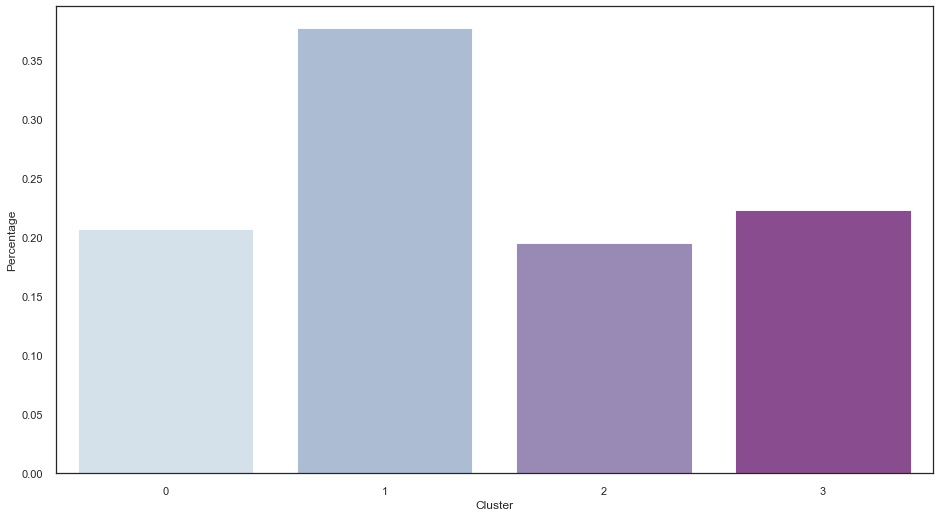

In [54]:
sns.set(style="white") #设置绘图背景

cluster_img = sns.barplot(x="Cluster", y="Percentage",data=clustering,
                   palette="BuPu",ci=95,errcolor='yellow', errwidth=2, alpha=0.9) #BuPu

## Silhouette Coefficient

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(data_features,data['Clusters'])

0.2929705305305738